In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
colors = sns.color_palette()

In [2]:
df_2 = pd.read_csv('results-2mins.bak.csv')
df_5 = pd.read_csv('results-5mins.bak.csv')
print(df_2.shape)
print(df_2.columns.values)

(216, 11)
['final_learning_rate' 'include_digit_length_classifier' 'layers'
 'learning_rate' 'num_hidden' 'step' 'test_accuracy' 'train_accuracy'
 'use_dropout' 'use_max_pool' 'valid_accuracy']


c:\users\navneet\desktop\udacity\ml\deeplearning\digicam\myvenv\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


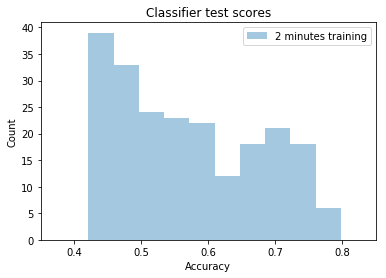

count    216.000000
mean       0.569963
std        0.106044
min        0.421000
25%        0.470250
50%        0.550500
75%        0.670250
max        0.798000
Name: test_accuracy, dtype: float64


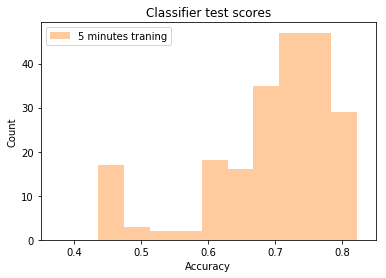

count    216.000000
mean       0.694394
std        0.098310
min        0.436000
25%        0.650250
50%        0.725500
75%        0.763000
max        0.822000
Name: test_accuracy, dtype: float64


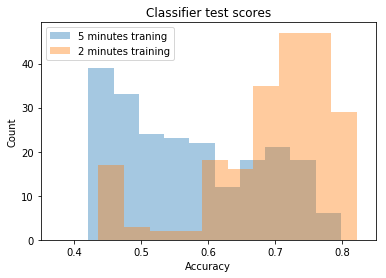

In [3]:
#investigating the scores

sns.distplot(df_2['test_accuracy'], kde=False, bins=10)
plt.xlim([0.35, 0.85])
plt.title('Classifier test scores')
plt.xlabel('Accuracy')
plt.ylabel('Count')
plt.legend(['2 minutes training'], loc='upper right')
plt.show()

print(df_2['test_accuracy'].describe())

sns.distplot(df_5['test_accuracy'], kde=False, bins=10, color=colors[1])
plt.xlim([0.35, 0.85])
plt.title('Classifier test scores')
plt.xlabel('Accuracy')
plt.ylabel('Count')
plt.legend(['5 minutes traning'], loc='upper left')
plt.show()

print(df_5['test_accuracy'].describe())

sns.distplot(df_2['test_accuracy'], kde=False, bins=10)
sns.distplot(df_5['test_accuracy'], kde=False, bins=10)
plt.xlim([0.35, 0.85])
plt.title('Classifier test scores')
plt.xlabel('Accuracy')
plt.ylabel('Count')
plt.legend(['5 minutes traning', '2 minutes training'], loc='upper left')
plt.show()

In [4]:
#investigating the top 5%

def show_parameter_counts(df, percent, mins):
    df_top = df.sort_values('test_accuracy', ascending=False).iloc[:int(df.shape[0] * percent)]
    print('*' * 40)
    print("* Top %d%% test scores %d minutes training" % (percent * 100., mins))
    print('*' * 40)
    print("Total rows:%d\n" % df_top.shape[0])
    print("Scores")
    print(df_top['test_accuracy'].values)
    print('')
    print('Parameter frequencies')
    plot_columns = ['layers',
                    'learning_rate',
                    'num_hidden',
                    'use_dropout',
                    'use_max_pool']
    for a in plot_columns:
        print(df_top.groupby(a).size())
        print('')
        

for a,b in [(df_2, 2), (df_5, 5)]:
    show_parameter_counts(a, 0.05, b)

****************************************
* Top 5% test scores 2 minutes training
****************************************
Total rows:10

Scores
[0.798 0.782 0.778 0.772 0.772 0.761 0.76  0.757 0.751 0.747]

Parameter frequencies
layers
[16, 32]       2
[16]           1
[32]           1
[8, 16, 32]    1
[8, 16]        4
[8]            1
dtype: int64

learning_rate
0.05    1
0.10    9
dtype: int64

num_hidden
32     1
64     2
128    7
dtype: int64

use_dropout
False    10
dtype: int64

use_max_pool
True    10
dtype: int64

****************************************
* Top 5% test scores 5 minutes training
****************************************
Total rows:10

Scores
[0.822 0.82  0.817 0.817 0.815 0.814 0.812 0.811 0.81  0.81 ]

Parameter frequencies
layers
[16, 32]       6
[8, 16, 32]    3
[8, 16]        1
dtype: int64

learning_rate
0.05    6
0.10    4
dtype: int64

num_hidden
32     3
64     3
128    4
dtype: int64

use_dropout
False    10
dtype: int64

use_max_pool
True    10
dtype: in

In [5]:
# investigating the top classifier

df_train = pd.read_csv('top_classifier_training.csv')
df_train.columns.values

array(['learning_rate', 'step', 'loss', 'batch_accuracy',
       'validation_accuracy', 'test_accuracy'], dtype=object)

In [6]:
def add_plot_details(title, xlabel, ylabel):
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

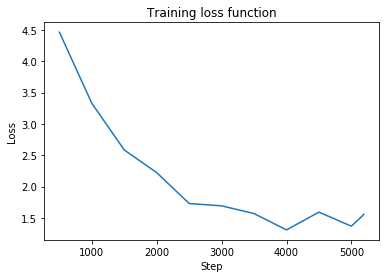

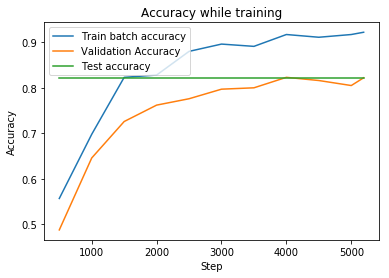

In [7]:
plt.plot(df_train['step'], df_train['loss'])
add_plot_details('Training loss function', 'Step', 'Loss')
plt.plot(df_train['step'], df_train[['batch_accuracy', 'validation_accuracy', 'test_accuracy']])
plt.legend(['Train batch accuracy', 'Validation Accuracy', 'Test accuracy'], loc='upper left')
add_plot_details('Accuracy while training', 'Step', 'Accuracy')
# plt.plot(df_train['step'], df_train['learning_rate'])
# add_plot_details('Learning rate', 'Step', 'Learning rate')

count    216.000000
mean       0.694394
std        0.098310
min        0.436000
25%        0.650250
50%        0.725500
75%        0.763000
max        0.822000
Name: test_accuracy, dtype: float64


c:\users\navneet\desktop\udacity\ml\deeplearning\digicam\myvenv\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


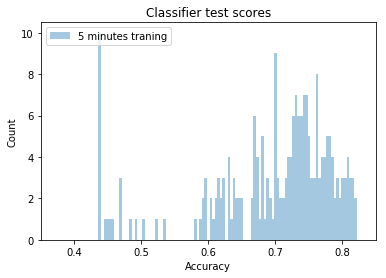

In [8]:
#Investigating significance against benchmark

print(df_5['test_accuracy'].describe())

sns.distplot(df_5['test_accuracy'], kde=False, bins=100)
plt.xlim([0.35, 0.85])
plt.title('Classifier test scores')
plt.xlabel('Accuracy')
plt.ylabel('Count')
plt.legend(['5 minutes traning', '2 minutes training'], loc='upper left')
plt.show()

c:\users\navneet\desktop\udacity\ml\deeplearning\digicam\myvenv\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


count    194.000000
mean       0.721031
std        0.060520
min        0.579000
25%        0.681250
50%        0.731000
75%        0.765750
max        0.822000
Name: test_accuracy, dtype: float64
Ttest_1sampResult(statistic=0.1374186487194639, pvalue=0.8921456924188548)


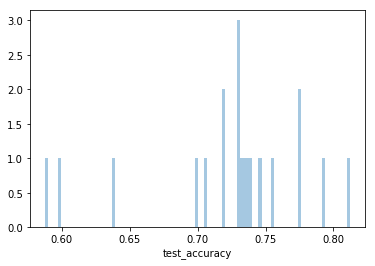

In [9]:
import scipy.stats

df_sig = df_5[df_5.test_accuracy > 0.55]
sample = df_5['test_accuracy'].sample(20)

sns.distplot(sample, kde=False, bins=100)

print(df_sig['test_accuracy'].describe())

print(scipy.stats.ttest_1samp(sample, df_sig['test_accuracy'].mean()))